##  **SyriaTel Customer Churn Prediction**

### *Group 5: Musi Calori, Jessica Gichimu, Vicker Ivy, Bob Lewis*


## 1. Business Understanding

### 1.1 Business Overview

SyriaTel is a telecommunications company that provides mobile services such as voice calls, messaging and data plans. As a provider in the competitive telecom industry, its operations rely on recurring subscription revenue from customers.

A major business challenge in this sector is customer churn, where subscribers discontinue their service. Churn reduces revenue and increases costs, since acquiring new customers requires more investment than retaining existing ones. Addressing churn is therefore important for SyriaTel to maintain profitability and remain competitive in the market.

### 1.2 Problem Statement

Customer churn is a key challenge for SyriaTel as losing subscribers reduces revenue and increases the cost of acquiring replacements. To remain competitive, the company needs to identify customers who are likely to leave and intervene before they discontinue their service.

To address this challenge, the project builds a classification model that predicts churn and highlights the main factors influencing it. The insights will support SyriaTel in reducing churn, improving customer retention and strengthening long term customer loyalty and profitability.

### 1.3 Business Objectives


#### 1.3.1 Main Objective

The main objective of this project is to develop a classification model that predicts customer churn for SyriaTel and identifies the key factors influencing it. The results will help the company reduce churn, improve customer retention and protect long term profitability.

#### 1.3.2 Specific Objectives

To achieve the main objective, the project has the following specific objectives:

1. Develop a churn prediction model and evaluate its performance using relevant metrics.

2. Identify the key features and customer characteristics that significantly influence churn.

3. Compare different classification models to select the one that best balances predictive performance with business needs.

#### 1.3.3 Research Questions

To ensure the analysis directly addresses SyriaTel’s business problem, the following research questions were defined:

1. Can a churn prediction model achieve strong performance?

2. Which features and customer characteristics have the greatest influence on churn?

3. Which classification model provides the best balance between predictive performance and business applicability?

The notebook will answer these research questions through data preparation, model development, evaluation and interpretation to provide data driven insights that support customer retention strategies.

### 1.4 Success Criteria

The success of this project will be evaluated using the following criteria:

- Technical Success: The churn prediction model should achieve a recall score of at least 0.80, ensuring that most customers likely to churn are correctly identified. Supporting metrics such as precision, F1-score and ROC-AUC will also be used to confirm balanced model performance.

- Business Success: The model should produce clear insights into the main factors that drive churn, enabling SyriaTel to better understand customer behavior and support decisions that improve retention and profitability.

## 2. Data Understanding

This section introduces the SyriaTel Customer Churn dataset used for the project. The dataset contains customer account information, service plan details, usage patterns and churn labels which provide the basis for building predictive models.

The aim is to understand the structure and contents of the dataset. This involves reviewing the available features, checking their data types and identifying potential issues such as missing values or unusual patterns.

By exploring the data at this stage, it is possible to detect quality concerns early and begin considering how the dataset can best be prepared for modeling to answer the business questions.


### 2.1. Loading and Previewing the Dataset

The necessary Python libraries for data handling, visualization and modeling are imported. These include pandas, NumPy, Seaborn, Matplotlib and Scikit-learn, as well as utilities for evaluation metrics and class imbalance.

The SyriaTel Customer Churn dataset is then loaded from a CSV file into a pandas DataFrame. Basic inspection functions are applied to confirm successful loading and to preview the structure of the dataset.

#### 2.1.1 Importing Required Libraries

In [1064]:
# Import required libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from scipy import stats
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, RocCurveDisplay

# Algorithms for supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Suppress warnings for better readability
import warnings
warnings.filterwarnings('ignore')

# Set the seaborn plot size
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [1065]:
# Custom function loading
import importlib

# Import module
import utility

# Reloads the module to reflect changes
importlib.reload(utility) 

<module 'utility' from 'c:\\Users\\Jessica\\OneDrive\\Phase_3\\Group_5_Project\\Group5-phase3-project\\utility.py'>

#### 2.1.2 Loading the Dataset

In this section, the file is loaded into a pandas DataFrame.

In [1066]:
# Load the dataset
churn_df = pd.read_csv('churn.csv')

#### 2.1.3 Previewing the Data

In [1067]:
# Preview the first five rows
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- Each row in the dataset represents a SyriaTel customer account. The columns include customer attributes such as state, account length, service plans, call and usage statistics, charges and churn status. This information will help in analyzing customer behavior and building models to predict churn.

### 2.2 Data Overview

This section covers the initial overview of the dataset.

In [1068]:
# Check the shape of the dataset
churn_df.shape

(3333, 21)

- The dataset has 3333 rows and 21 columns.

In [1069]:
# Display data types
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- All the columns in the dataset are non null.

In [1070]:
# Display the numerical and categorical columns
print(f"Numerical columns: {churn_df.select_dtypes(include='number').columns}\n")
print(f"Categorical columns: {churn_df.select_dtypes(include='object').columns}\n")

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



Below is a description of all the numerical and categorical features in the dataset:

Numerical Features:

- account length: The number of days the customer has been an account holder.

- area code: The area code associated with the customer's phone number.

- number vmail messages: The number of voice messages received by the customer.

- total day minutes: The total number of minutes used by the customer during the day.

- total day calls: The total number of calls made by the customer during the day.

- total day charge: The total charges incurred by the customer during the day.

- total eve minutes: The total number of minutes used by the customer in the evening.

- total eve calls: The total number of calls made by the customer in the evening.

- total eve charge: The total charges incurred by the customer in the evening.

- total night minutes: The total number of minutes spent by the customer at night.

- total night calls: The total number of calls made by the customer at night.

- total night charge: The total charged incurred by the customer at night.

- total intl minutes: The total number of minutes spent by the customer on international calls.

- total intl calls: The total number of international calls made by the customer.

- total intl charge: The total charge incurred by the customer on international calls.

- customer service calls: The number of calls made by customer service to customers.

Categorical Features:

- state: The customer's state of residence.

- phone number: The customer's mobile number.

- international plan: Indicates if the customer has subscribed to an international plan (Yes/No)

- voice mail plan: Indicates if the customer has a voice mail plan (Yes/No)

### 2.3 Descriptive Statistics

This section summarizes the numerical and categorical features, highlighting central tendencies, variability and potential outliers to guide further analysis.

In [1071]:
# Display summary statistics
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The statistical overview of numeric columns in the dataset is as follows:

- The account length ranges from 1 to 243 days, with an average of about 101 days, showing wide variation in how long customers have been with SyriaTel.

- The number of voicemail messages has a mean of 9 but a median of 0, indicating that most customers do not use voicemail services.

- The total day minutes range from 0 to 350.8 minutes, with an average of 179.8, showing some customers have no daytime usage while others record high activity.

- The international minutes average only 2.8 minutes, with many customers at 0, reflecting low international call usage overall.

- The customer service calls range from 0 to 9, with a median of 1, suggesting that most customers rarely contact support, while a smaller group reaches out more often.

These insights are useful for identifying customer behavior patterns and signal which features may influence churn.

In [1072]:
# Check for missing values
churn_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

- The review of missing values shows that there are zero missing values in the dataset.

### 2.4 Key Observations

Based on the initial loading and structure review of the dataset, the following key observations were made:

- The dataset contains 3,333 rows and 21 columns which include customer demographics, service plans, usage patterns, charges and churn status.

- No missing values are present across the dataset which ensures completeness for analysis.

- Numerical features such as usage minutes and charges show wide variability with some extreme values that may represent outliers.

- The number of voicemail messages is highly skewed as most customers do not use voicemail services.

- The churn column which is the target variable will require further examination to assess class balance before modeling.

These observations provide an initial understanding of data quality and structure. In addition, it shows areas to be addressed during data preparation in the following section.

## 3. Data Preparation
In this section, we will look into data cleaning techniques, Exploratory Data Analysis (EDA) and data preprocessing (data wrangling) for our dataset. This step is paramount to provide data that will contribute significantly to the performance of the prediction model

### 3.1 Data Cleaning

In this step, basic data cleaning is done to ensure the dataset is consistent and ready for modeling. The process involves:

- Checking for and handling null values

- Identifying and removing duplicate rows

- Standardizing column names by capitalizing words and separating them with underscores

These tasks are completed using the clean_nulls_and_duplicates function from the utility.py file.

In [1073]:
# Import the clean_nulls_and_duplicates function
from utility import clean_nulls_and_duplicates

# Pass in the churn_df dataframe
churn_df = clean_nulls_and_duplicates(churn_df)

Initial shape of the dataset: (3333, 21)

No null values detected.

No duplicate rows detected.
Index(['State', 'Account_Length', 'Area_Code', 'Phone_Number',
       'International_Plan', 'Voice_Mail_Plan', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

 Final shape of data: (3333, 21)


In [1074]:
# Drop the Phone_Number column
churn_df = churn_df.drop('Phone_Number', axis=1)

# Check the remaining columns
churn_df.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'Voice_Mail_Plan', 'Number_Vmail_Messages', 'Total_Day_Minutes',
       'Total_Day_Calls', 'Total_Day_Charge', 'Total_Eve_Minutes',
       'Total_Eve_Calls', 'Total_Eve_Charge', 'Total_Night_Minutes',
       'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes',
       'Total_Intl_Calls', 'Total_Intl_Charge', 'Customer_Service_Calls',
       'Churn'],
      dtype='object')

- The Phone_Number column was removed since it does not contribute to churn prediction. This feature acts only as an identifier and has no analytical value.

- After dropping the column, the dataset now has 3,333 rows and 20 columns, ensuring that only useful attributes remain for further preparation and modeling.

In [1075]:
# Convert 'Area_Code' into an object datatype
churn_df['Area_Code'] = churn_df['Area_Code'].astype(object)
print(churn_df['Area_Code'].dtype)

object


- The Area_Code column is stored as an integer but represents identifiers for regions. It is converted into a categorical; object data type to reflect its role as a categorical feature. This prevents incorrect interpretation as a continuous numerical variable.

### 3.2 Exploratory Data Analysis

This section investigates the dataset to get insights, evaluate feature distributions, assess relationships and detect issues or outliers. The findings guide feature engineering, support modeling decisions and show potential challenges with data quality.

#### 3.2.1. Univariate Analysis

Univariate analysis explores each feature individually to understand its distribution, central tendency and spread. It helps detect issues, outliers or inconsistencies that may affect modeling.

##### 3.2.1.1 Churn Distribution

The distribution of the target variable Churn is examined to check class balance. Both absolute counts and percentages are displayed followed by a bar plot for visualization.

Churn counts:
Churn
False    2850
True      483
Name: count, dtype: int64

Churn distribution (%):
Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


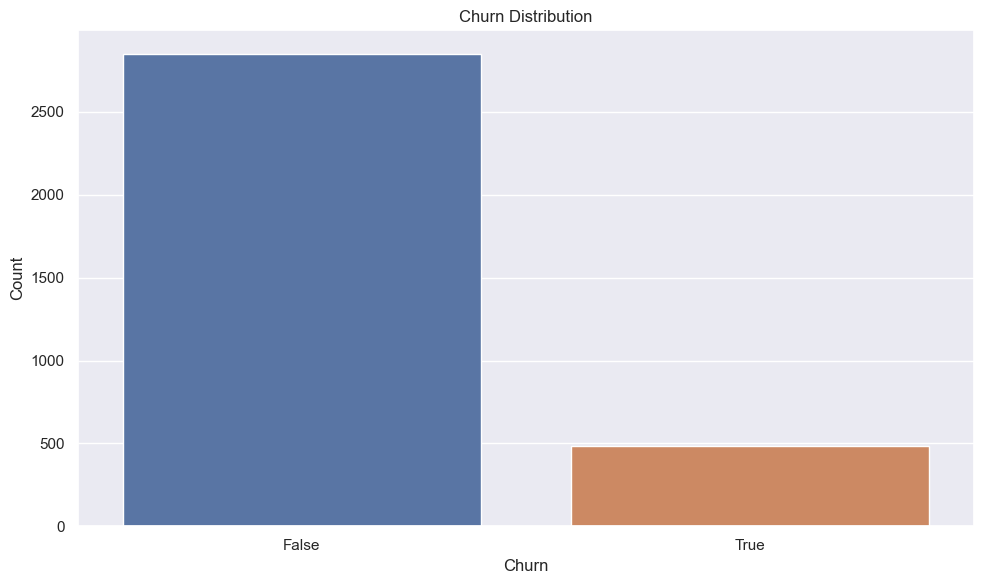

In [1076]:
# Distribution of the Churn target column

# Check the distribution of the unique values
print("Churn counts:")
print(churn_df['Churn'].value_counts())

# Check for normalized counts as a percentage
print("\nChurn distribution (%):")
print(churn_df['Churn'].value_counts(normalize=True) * 100)

# Visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=churn_df, palette='deep')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The churn distribution shows that out of 3,333 customers, 483 customer about 14.5% have churned while 2,850 customers about 85.5% have not churned. This indicates a high class imbalance with non churned customers making up the majority.

- Such imbalance is important to note because it can bias machine learning models toward predicting the majority class. Handling this imbalance will be important during model training to ensure that churned customers are correctly identified.

##### 3.2.1.2 Area Code Distribution

This section examines how customers are distributed across area codes to identify regions with the highest customer representation. The findings help show regional patterns that may impact service usage and churn behavior.

Area code counts:
Area_Code
415    1655
510     840
408     838
Name: count, dtype: int64

Area code distribution (%):
Area_Code
415    49.654965
510    25.202520
408    25.142514
Name: proportion, dtype: float64


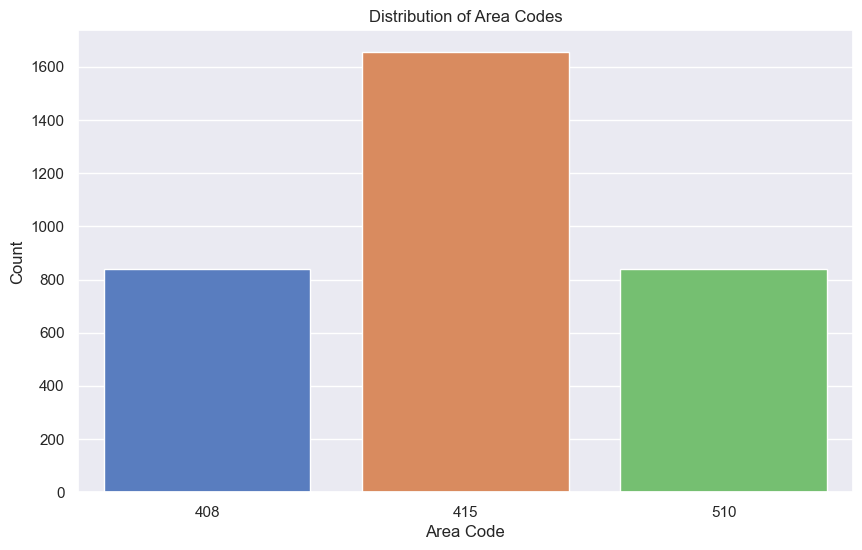

In [1077]:
# Check the distribution of the unique values
print("Area code counts:")
print(churn_df['Area_Code'].value_counts())

# Check for normalized counts as a percentage
print("\nArea code distribution (%):")
print(churn_df['Area_Code'].value_counts(normalize=True) * 100)

# Countplot of area code
plt.figure(figsize=(10, 6))
sns.countplot(x='Area_Code', data=churn_df, palette='muted')
plt.title('Distribution of Area Codes')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

- The distribution shows that most customers belong to area code 415 with about 50% while area codes 408 and 510 account for the remaining share at about 25% each.

- This shows that nearly half of the customer base is concentrated in a single area code which may have implications for service management and churn behavior.

##### 3.2.1.3 Distribution of categorical features

This section explores the distribution of three categorical features in the dataset: State, International_Plan and Voice_Mail_Plan. Analyzing these variables provides insights into customer demographics and service subscriptions that may influence churn.

The function plot_categorical_distributions from utility.py is used to generate the distributions for each feature.

**State Feature**

State counts:
State
WV    106
MN     84
NY     83
AL     80
OH     78
Name: count, dtype: int64


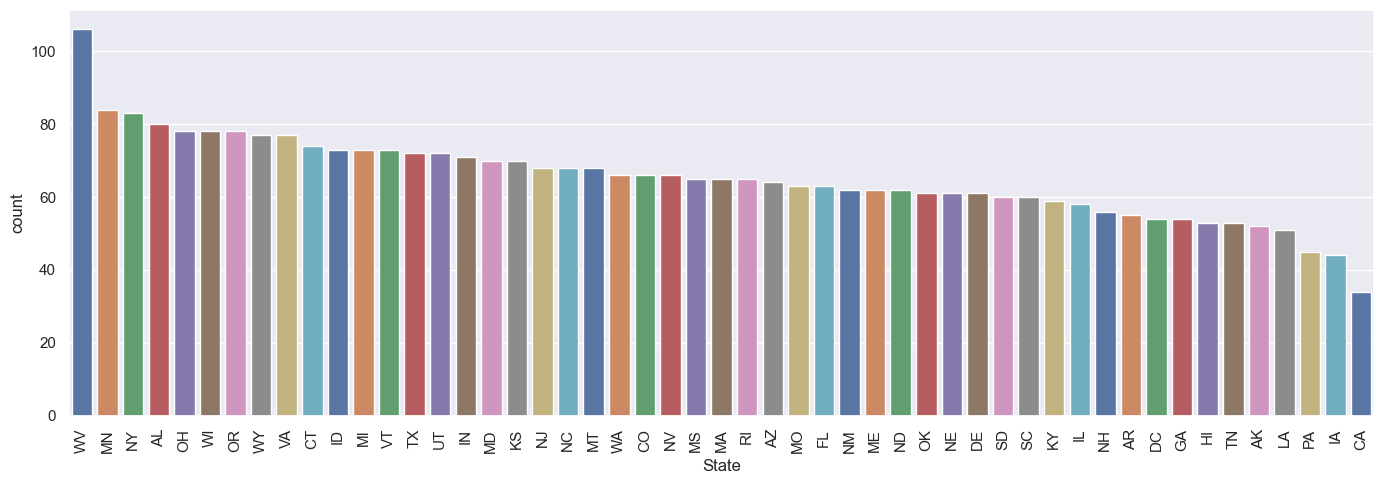

In [1078]:
# Check the distribution of the unique values
print("State counts:")
print(churn_df['State'].value_counts().head())

# Import the function from utility.py
from utility import categorical_distributions

# Pass in the dataframe and the State feature
categorical_distributions(churn_df, 'State')

- The State feature shows how customers are distributed across different states. The distribution is balanced with no state contributing an excessively large share. West Virginia (106), Minnesota (84) and New York (83) have the highest counts while states like California and Louisiana record the lowest.

- This spread shows that SyriaTel’s customer base is widely distributed across the U.S. which reduces the risk of regional bias in churn prediction and makes it possible to conduct data analysis.

**International Plan Feature**

International Plan counts:
International_Plan
no     3010
yes     323
Name: count, dtype: int64

International Plan distribution (%):
International_Plan
no     90.309031
yes     9.690969
Name: proportion, dtype: float64


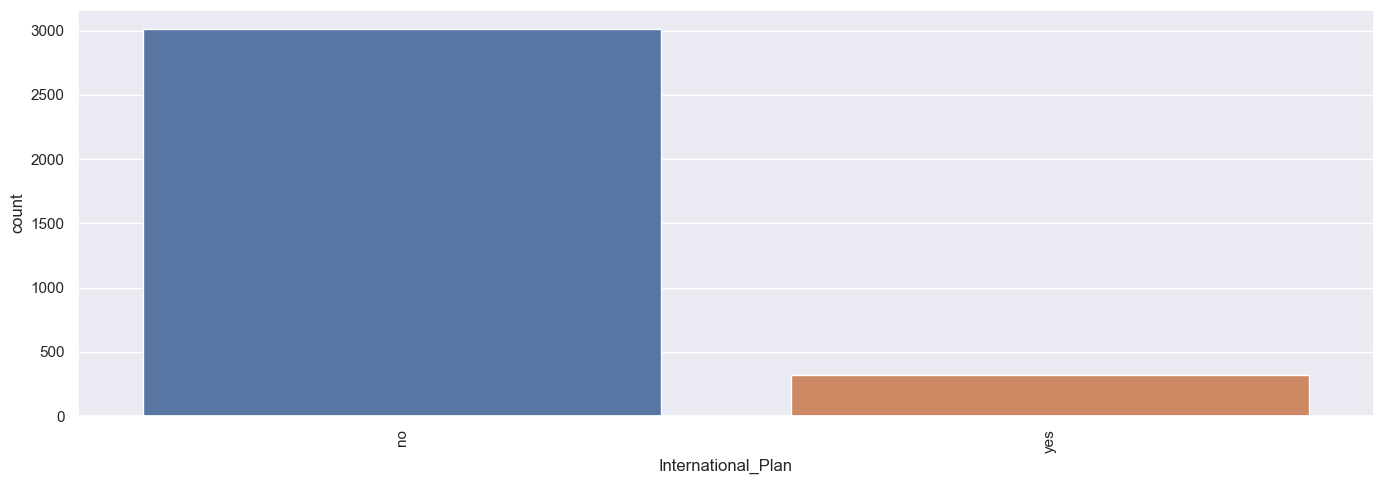

In [1079]:
# Check the distribution of the unique values
print("International Plan counts:")
print(churn_df['International_Plan'].value_counts())

# Check for normalized counts as a percentage
print("\nInternational Plan distribution (%):")
print(churn_df['International_Plan'].value_counts(normalize=True) * 100)

# Pass in the dataframe and the International_Plan feature
categorical_distributions(churn_df, 'International_Plan')

- The distribution shows that most customers of 3010 or about 90.3% do not subscribe to the International Plan.

- Only 323 customers or about 9.7% have it.

- This high imbalance shows that international services are not widely adopted which may affect churn behavior and modeling since customers with the plan could represent a distinct group with different usage or support needs.

**Voice Mail Feature**

Voice Mail Plan counts:
Voice_Mail_Plan
no     2411
yes     922
Name: count, dtype: int64

Voice Mail Plan distribution (%):
Voice_Mail_Plan
no     72.337234
yes    27.662766
Name: proportion, dtype: float64


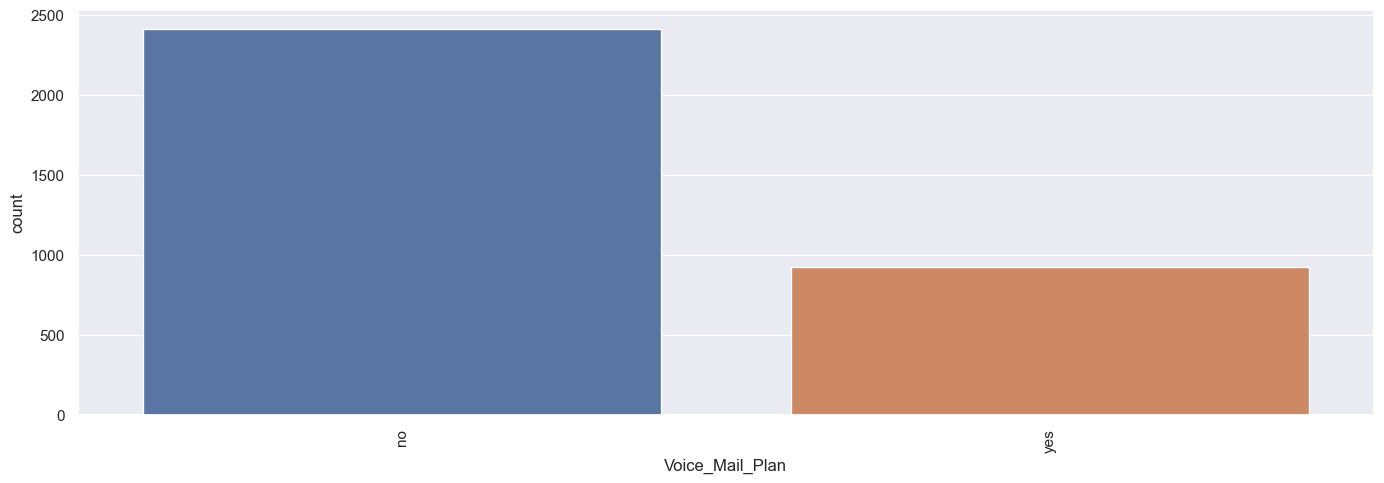

In [1080]:
# Check the distribution of the unique values
print("Voice Mail Plan counts:")
print(churn_df['Voice_Mail_Plan'].value_counts())

# Check for normalized counts as a percentage
print("\nVoice Mail Plan distribution (%):")
print(churn_df['Voice_Mail_Plan'].value_counts(normalize=True) * 100)

# Load the categorical distributions function and pass in the arguments
categorical_distributions(churn_df, 'Voice_Mail_Plan')

From the plot the following are observed:

- 72.3% or about 2411 customers do not have a Voice Mail Plan.

- 27.7% or about 922 customers use the plan.

- Adoption is higher than the International Plan showing voicemail is more common.

The feature may influence churn as subscribers could have different usage patterns.

##### 3.2.1.4 Numerical Features Distribution

This section examines the distribution of numerical features using Kernel Density Estimation (KDE) plots. The analysis focuses on:

- Identifying customer usage patterns across minutes, calls and charges.

- Detecting potential outliers that may indicate churn risk.

The numerical_distributions function from utility.py generates KDE plots for each numerical feature in the dataset.

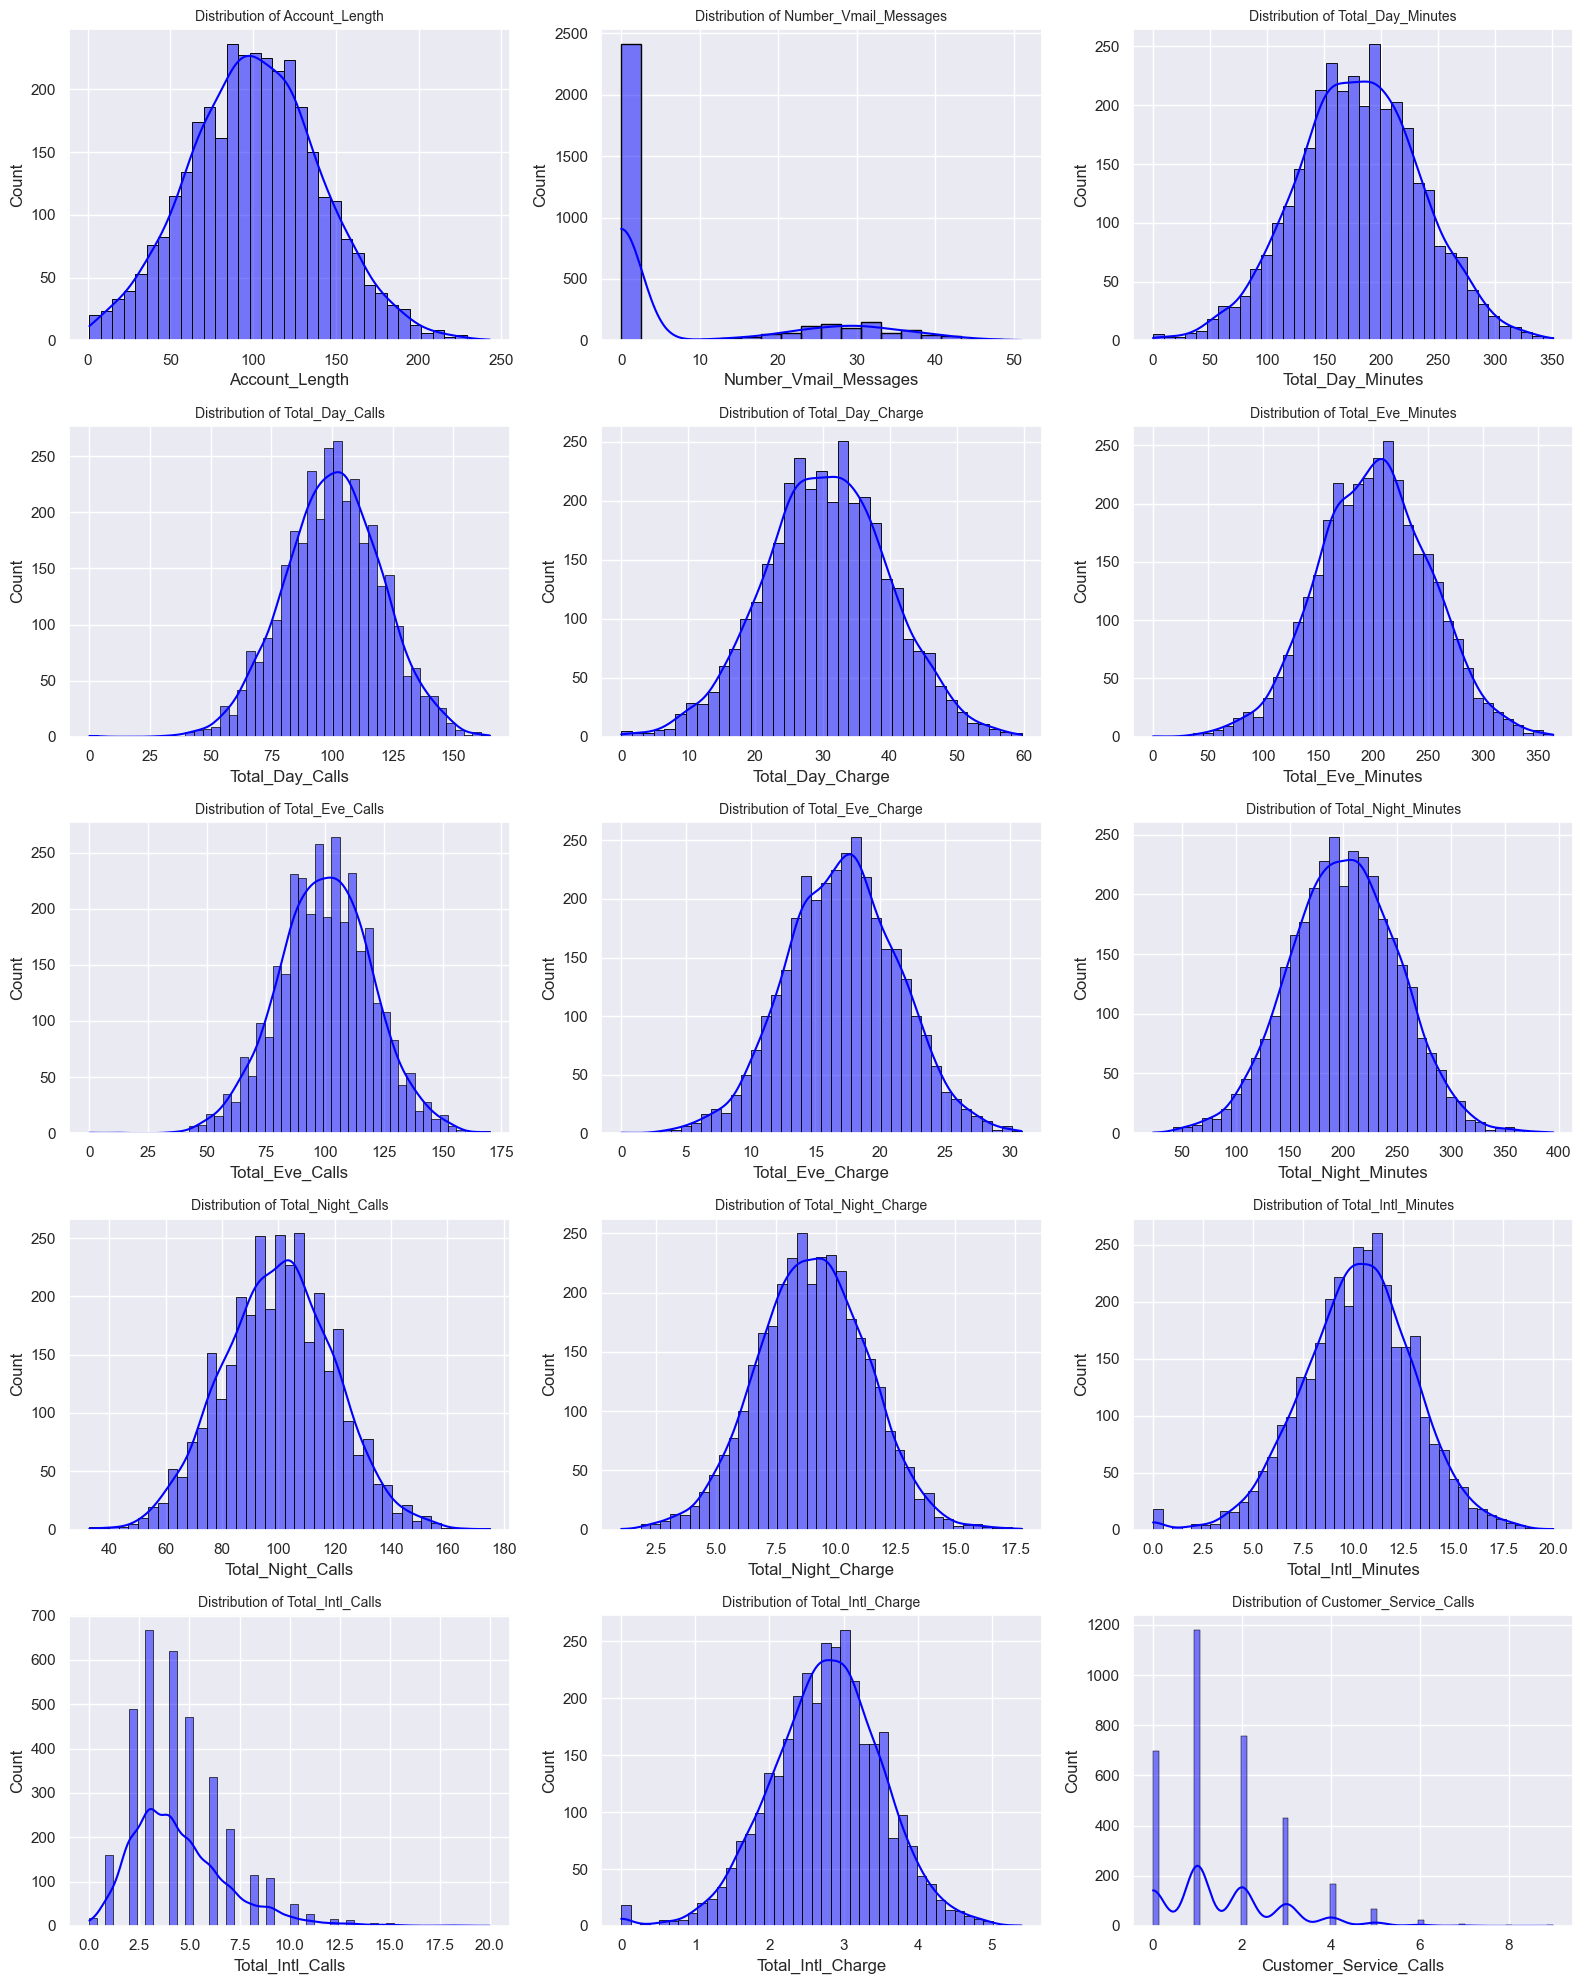

In [1081]:
# Define the numerical features
numerical_features = [
    'Account_Length', 'Number_Vmail_Messages', 'Total_Day_Minutes', 'Total_Day_Calls', 
    'Total_Day_Charge', 'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge', 
    'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes', 
    'Total_Intl_Calls', 'Total_Intl_Charge', 'Customer_Service_Calls'
]

# Import the function from 'utility.py'
from utility import numerical_distribution

# Call the numerical_distributions function
numerical_distribution(churn_df, numerical_features)

The distributions of numerical features are as follows:

- Account Length is approximately normally distributed showing balanced variation in account duration.

- Total Day, Evening and Night Minutes or Charges follow near normal distributions showing consistent usage patterns across customers.

- Total Calls; Day, Evening, Night are almost normal suggesting stable call behavior.

- Number of Vmail Messages is highly skewed with most customers not using voicemail.

- Total International Minutes or Charges are normally distributed while Total International Calls are right skewed showing a smaller group with high activity.

- Customer Service Calls is right skewed with most customers making few calls but a minority making many. This could mean dissatisfaction.

These patterns show overall stable service usage with a few skewed features that may influence churn behaviour.

#### 3.2.2. Bivariate Analysis

Bivariate analysis in EDA examines the relationship between two variables to identify patterns and dependencies. In the project, the relationship between categorical features and the target variable Churn is analyzed.

##### 3.2.2.1 Categorical features vs Churn

This analysis directly supports Research Question 2 by showing how customer characteristics such as State, International Plan and Voice Mail Plan influence churn.

Bar plots are used to compare churn outcomes across these features helping to show which attributes have the strongest impact on customer retention.

**State Feature**

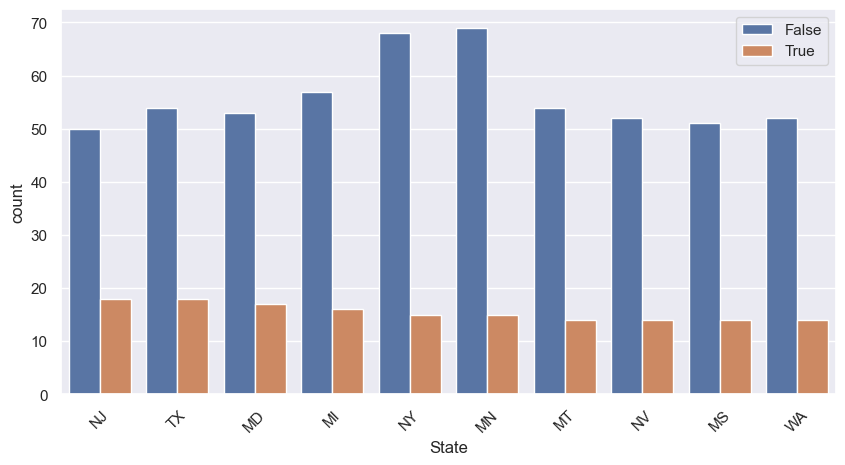

In [1082]:
# Import the function from utility.py
from utility import categorical_churn

# Pass the dataframe and feature
categorical_churn(churn_df, 'State')

- The distribution shows churn occurs across all states with different frequencies.

- Certain states such as New York record slightly higher churn counts which could mean possible regional differences.

- While no extreme outliers are visible these findings confirm that geographic location is a relevant customer characteristic and may contribute to churn prediction. This finding supports Research Question 2.

**International Plan Feature**

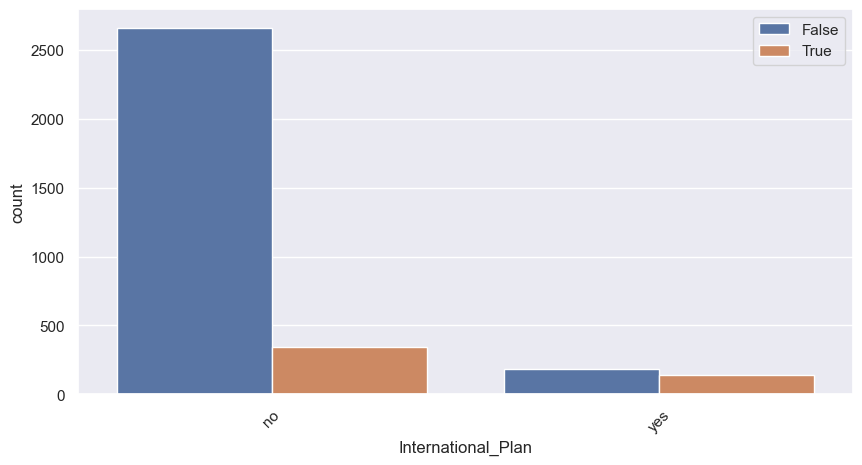

In [1083]:
# Pass the dataframe and feature
categorical_churn(churn_df, 'International_Plan')

- Customers with an international plan show a higher churn rate compared to those without. 

- Despite being a small portion of the base this group is more likely to leave. 

- International plan status is a strong predictor of churn supporting Research Question 2.  


**Voice Mail Plan**

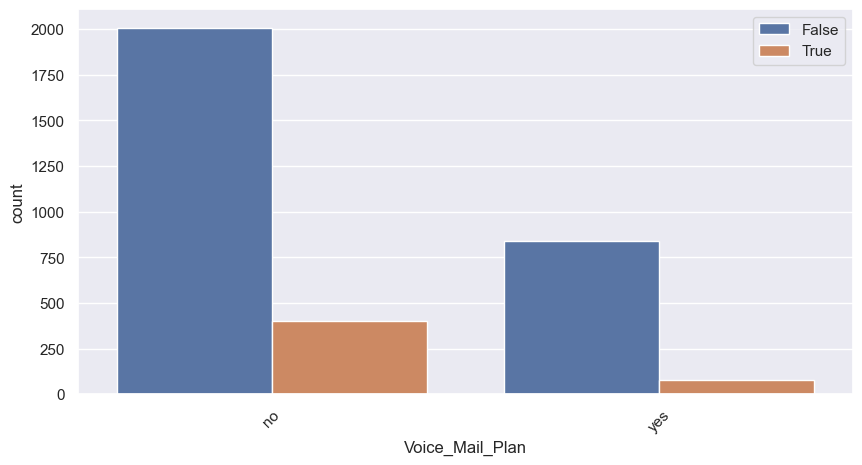

In [1084]:
# Pass the dataframe and feature
categorical_churn(churn_df, 'Voice_Mail_Plan')

The following were the key observations:

- Majority without a voice mail plan show both churn and non churn cases.

- A smaller group with a plan is also present but churn is noticeably lower compared to non churn.

- The difference could mean that the presence of a voice mail plan may not strongly prevent churn. However, it remains an important feature for analysis.

This insight contributes to Research Question 2 on identifying customer characteristics that influence churn.

##### 3.2.2.2 Customer Service Calls vs Churn

In this section, we want to visualize the variation in churn with the number of customer service calls. This will help us in determining whether customer service calls are a major contributor towards customer churning.

We will also implement a hue of Area_Code in order to see the area code that had the highest rate of churn.

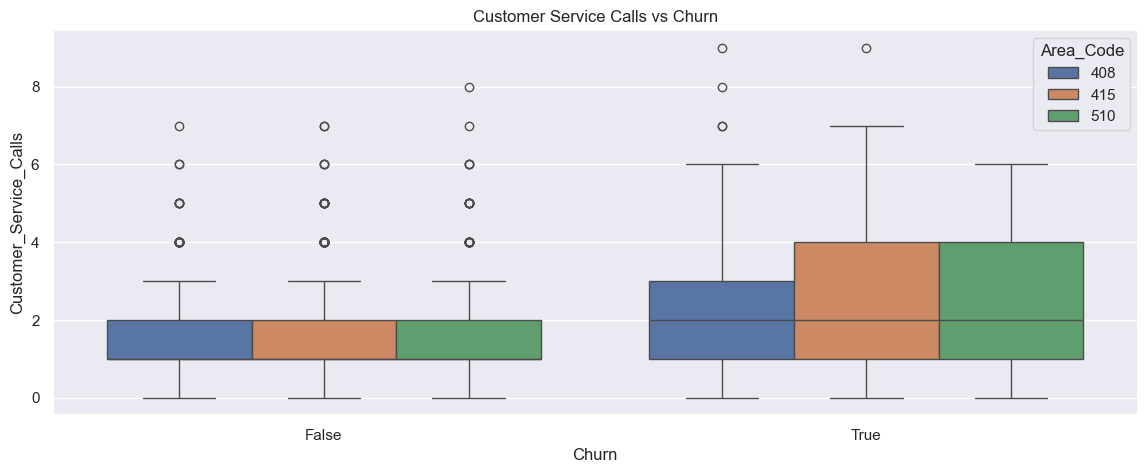

In [1085]:
# Boxplot to show area code with the highest churn
plt.figure(figsize=(14, 5))
sns.boxplot(data=churn_df, x='Churn', y='Customer_Service_Calls', hue='Area_Code', palette='deep')
plt.title('Customer Service Calls vs Churn')
plt.savefig('images_customer_service_churn.jpg', dpi=300)
plt.show()

- Customers with higher numbers of customer service calls show a greater likelihood of churn.

- Churn rates increase sharply when service calls exceed three that could mean dissatisfaction or unresolved issues.

- This confirms that customer support interactions are a critical driver of churn aligning with Research Question 2 on identifying key customer characteristics.

##### 3.2.2.3 Numerical Features vs Churn

This section examines how numerical features such as Total Day Charge, Total Eve Charge, Total Night Charge and Total Intl Charge vary between churned and non churned customers. Kernel Density Estimation (KDE) plots are used to show differences in distribution helping to identify whether higher usage and charges are associated with churn.

The utility function kde_plots_with_churn generates each plot. It takes in the dataframe, feature and the charge type; day, evening, night or international.

**Total Day Charge Feature**

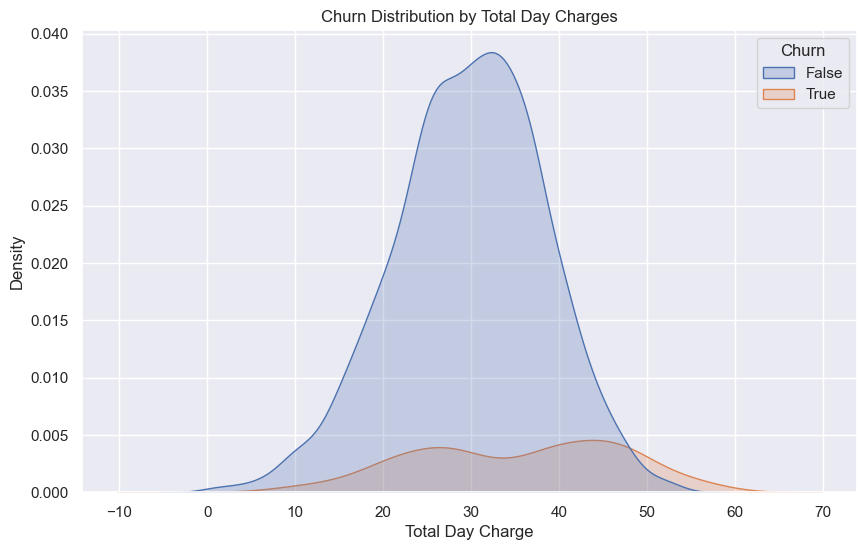

In [1086]:
# Import the function from utility.py
from utility import kde_plots_with_churn

# Pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Day_Charge', 'Day')

- This KDE plot shows the distribution of Total Day Charges for customers who churned as Churn = True vs those who did not as Churn = False.

- From the plot, the orange; churned curve has a longer right tail and maintains density at higher values of day charges.

- This implies that customers who churn tend to have higher day charges than those who do not churn. 

**Total Evening Charge Feature**

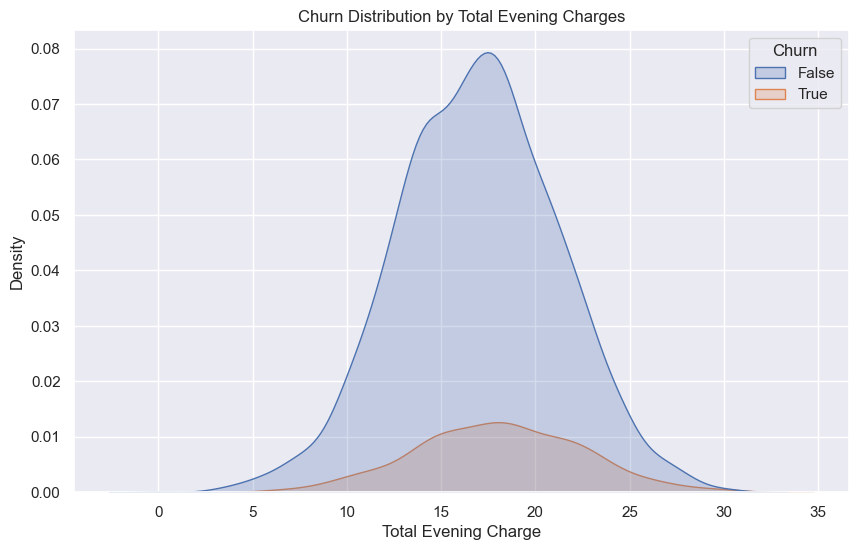

In [1087]:
# Pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Eve_Charge', 'Evening')

In this plot the key observations are as follows:

- The non churned group; blue has a tighter and higher peak between 15-20 while the churned group; orange is lower and flatter with a small shift towards higher evening charges.

- The churned group maintains more density beyond about 25 compared to the non churned group similar to the trend seen with the day charges.

- From this, customers who churned show a tendency to have higher evening charges but the separation between churned and non churned is less pronounced.

**Total Night Charge Feature**

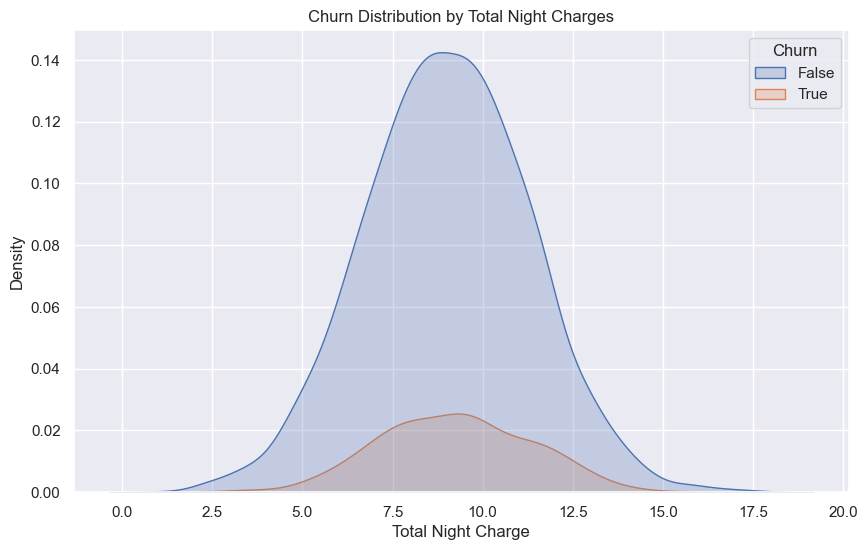

In [1088]:
# Pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Night_Charge', 'Night')

- Night charges are slightly higher among churned customers.

- Strong overlap between churned and non-churned groups.

- Night charges alone are not a strong churn indicator.

**Total International Charge Feature**

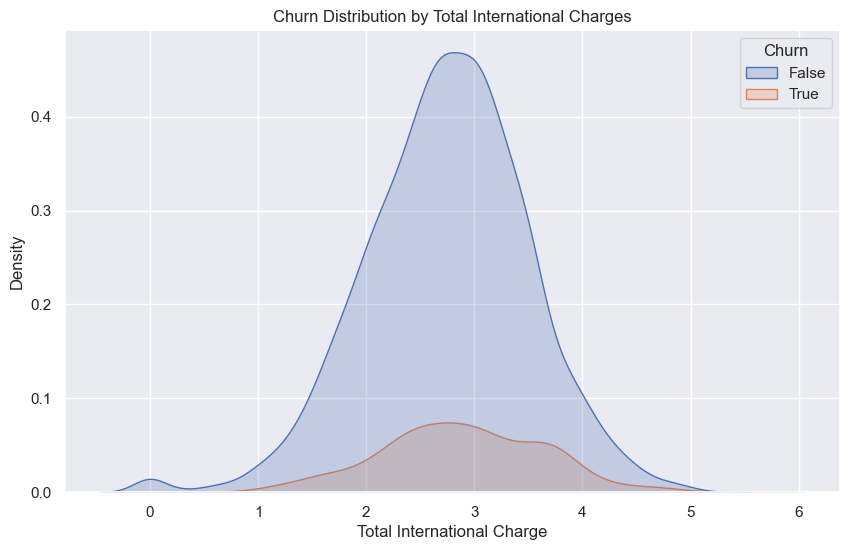

In [1089]:
# Pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Intl_Charge', 'International')

From the density plot the following are the key observations:

- Non churning customers cluster around moderate international charges of about 2.5 to 3.0.

- Churning customers show higher and more variable international charges of especially above 4.0.

- Very low charges of below 1.0 are mostly linked to customer retention.

#### 3.2.3. Feature correlation

In this section, a correlation heatmap is used to evaluate the strength of relationships between numerical features and the target variable Churn. This step helps in identifying potential predictors of churn and detecting multicollinearity among features.

A custom function correlation_heatmap was created in utility.py to take a dataframe and return a correlation heatmap of numerical variables against the target.

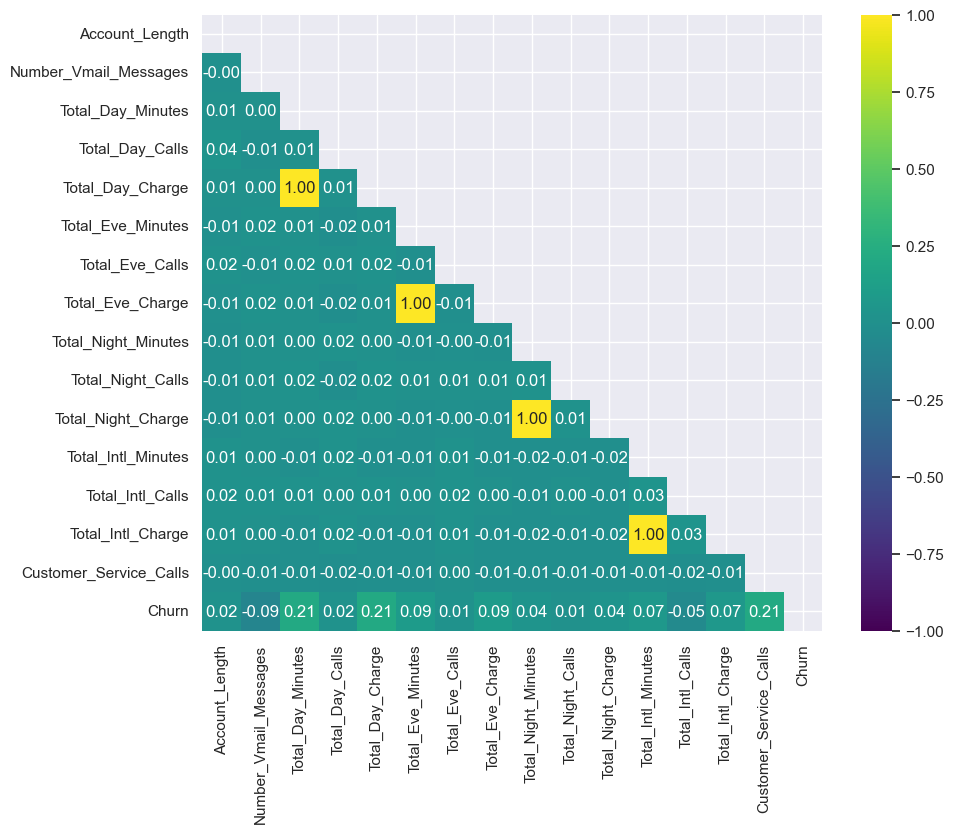

In [1090]:
# Import the function from utility.py
from utility import correlation_heatmap

corr_matrix = churn_df.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.show()


The heatmap shows strong relationships among features:

- Perfect correlations (1.0) exist between Total_Day_Minutes and Total_Day_Charge, Total_Eve_Minutes and Total_Eve_Charge, Total_Night_Minutes and Total_Night_Charge, and Total_Intl_Minutes and Total_Intl_Charge. These show fixed per minute rates so only one feature from each pair should be retained to prevent redundancy.

- Customer_Service_Calls shows the strongest positive correlation with churn making it an important predictor.

- International usage also shows a modest positive link with churn while most other features exhibit minimal correlation.

#### 3.2.4. Multicollinearity check

Multicollinearity occurs when independent variables are highly correlated leading to redundancy and reduced model interpretability. A correlation threshold of 0.9 was applied and one feature from each highly correlated pair was removed.

- Dropped features: Total_Day_Charge, Total_Eve_Charge, Total_Night_Charge, Total_Intl_Charge.

- These features were perfectly correlated with their respective minute variables.

- Removing them improves model stability, minimizes overfitting risk and ensures each remaining feature provides distinct information.

The function drop_highly_correlated_features was created. It takes in a dataframe and returs a dataframe with dropped features.

In [1091]:
# Import the function from utility.py
from utility import drop_highly_correlated_features

#Pass in the dataframe
cleaned_churn_df, dropped_features = drop_highly_correlated_features(churn_df, threshold=0.9)

# Display the dropped features
print("Dropped Features:", dropped_features)

# Display the correlation matrix
correlation_matrix = cleaned_churn_df.corr(numeric_only=True)

print("\nCorrelation Matrix:")

# Rounded for readabily
print(correlation_matrix.round(2))  


Dropping 4 highly correlated features (r > 0.9): ['Total_Day_Minutes', 'Total_Eve_Minutes', 'Total_Night_Minutes', 'Total_Intl_Minutes']
Dropped Features: ['Total_Day_Minutes', 'Total_Eve_Minutes', 'Total_Night_Minutes', 'Total_Intl_Minutes']

Correlation Matrix:
                        Account_Length  Number_Vmail_Messages  \
Account_Length                    1.00                  -0.00   
Number_Vmail_Messages            -0.00                   1.00   
Total_Day_Calls                   0.04                  -0.01   
Total_Day_Charge                  0.01                   0.00   
Total_Eve_Calls                   0.02                  -0.01   
Total_Eve_Charge                 -0.01                   0.02   
Total_Night_Calls                -0.01                   0.01   
Total_Night_Charge               -0.01                   0.01   
Total_Intl_Calls                  0.02                   0.01   
Total_Intl_Charge                 0.01                   0.00   
Customer_Service_Call

- The features Total_Day_Minutes, Total_Eve_Minutes, Total_Night_Minutes and Total_Intl_Minutes were dropped due to perfect correlation with their respective charge variables.  

- This step removes redundancy since minutes and charges convey the same information at fixed rates.  

- By keeping only one representative from each pair, the dataset is simplified while ensuring that all retained features contribute unique predictive value.  


#### 3.2.5. Handling outliers  

Outliers are extreme data points that can distort model performance and reduce reliability.  

The function remove_outliers_zscore was created. It takes in a dataframe and returns a new dataframe with rows removed where any numerical column has a Z-score exceeding a threshold of 3.

This process ensures a cleaner dataset, minimizes noise and improves model accuracy.

In [1092]:
# Import the function fro utility.py
from utility import remove_outliers_zscore

# Pass in the dataframe
cleaned_churn_df = remove_outliers_zscore(cleaned_churn_df, z_threshold=3.0)

# Print the shape of the new dataframe
print("Shape of dataset after removing outliers:", cleaned_churn_df.shape)

Shape of dataset after removing outliers: (3169, 16)


The function remove_outliers_zscore works as follows:

- Identify numeric columns: Selects only numerical features; integers and floats.

- Compute Z-scores: Measures how far each value is from the mean in standard deviations.  

- Apply threshold: Rows with any feature’s Z-score greater than 3 are flagged as outliers.

- Filter data: Keeps only rows within the threshold returning a cleaned dataset.  

This ensures that extreme values are removed, reducing noise and improving the reliability of the dataset for modeling.  

### 3.3. Data Preprocessing 

Data preprocessing is the process of preparing raw data into a usable format for analysis and modeling. It includes steps such as encoding categorical variables and scaling numerical features to ensure accuracy, consistency and compatibility with machine learning algorithms.  

In this project, the preprocessing steps include:

- One-Hot Encoding

- Label Encoding  
  
- Feature Scaling  

#### 3.3.1. One-Hot Encoding

One-Hot Encoding is used to convert categorical variables into a numerical format by creating new binary (0/1) columns for each category. This allows machine learning models to process categorical data without assuming any ordinal relationship.  

In this project, One-Hot Encoding is applied to the following categorical features. State, Area_Code, International_Plan and Voice_Mail_Plan.  

This transformation ensures that categorical information is properly represented for modeling, improving consistency and compatibility with algorithms.  


In [1093]:
# One-hot encode the categorical columns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# List of categorical columns to encode
categorical_cols = ['State', 'Area_Code', 'International_Plan', 'Voice_Mail_Plan']

# Create the ColumnTransformer with OneHotEncoder
# Steps to different columns in a dataframe
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep all other columns as they are
)

# Fit and transform the data
encoded_array = one_hot_encoder.fit_transform(cleaned_churn_df)

# Get the new column names from the encoder
encoded_columns = one_hot_encoder.named_transformers_['onehot'].get_feature_names_out(categorical_cols)

# Create a new DataFrame with the encoded data
preprocessed_churn_df = pd.DataFrame(encoded_array, columns=list(encoded_columns) + list(cleaned_churn_df.drop(columns=categorical_cols).columns))

# View the shape of the encoded DataFrame
preprocessed_churn_df.shape

(3169, 66)

- After encoding, the dataset expanded from 16 columns to 66 columns, ensuring all categorical information was captured in numerical format for machine learning models.  

#### 3.3.2. Label Encoding

Label Encoding converts categorical text values into numeric form by assigning integer labels. This step is applied to the Churn target variable, encoding it into binary values 0; No Churn and 1; Churn.

This transformation ensures the target variable is machine readable for modeling.


In [1094]:
# Use label encoding on Churn column
label_encoder = LabelEncoder()
preprocessed_churn_df['Churn'] = label_encoder.fit_transform(preprocessed_churn_df['Churn'])

# Display first 5 rows
preprocessed_churn_df['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

- The Churn column has been successfully encoded into binary values. 

- This step ensures the target variable is in a numerical format allowing models to interpret churn outcomes as 0 being No Churn and 1 being Churn.  


#### 3.3.3. Data Scaling

Data Scaling is the process of transforming features so they fall within the same range. It ensures that no feature dominates due to its magnitude.  

In this project, Min-Max Scaling is used to normalize features to a fixed range of -1 to 1. This allows all variables to contribute equally during model training and improving model performance.  

This scaling step will be applied in the modeling phase when defining the feature matrix X and target variable y.

## 4. Modelling

This section focuses on building predictive models to classify customer churn using the features in the dataset. The objective is to identify customers at risk of churn and generate insights that support effective retention strategies.  

Five models are trained and evaluated:  

- Logistic Regression. This is the baseline model for comparison  

- Decision Tree

- Random Forest

- K-Nearest Neighbors (KNN)

- Gradient Boosting Classifier  

Model performance is assessed using Recall which emphasizes the correct identification of churners. In addition, ROC-AUC which measures overall classification ability.  

The next step defines X which are the features and y which are the target variables with Churn serving as the target column.


In [1095]:
# Define X and y variables
X = preprocessed_churn_df.drop(columns='Churn', axis=1)
y = preprocessed_churn_df['Churn']

# Display the first 5 rows of X
X.head()

,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,...,Number_Vmail_Messages,Total_Day_Calls,Total_Day_Charge,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Calls,Total_Night_Charge,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,110,45.07,99,16.78,91,11.01,3,2.7,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,123,27.47,103,16.62,103,11.45,3,3.7,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,114,41.38,110,10.3,104,7.32,5,3.29,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,71,50.9,88,5.26,89,8.86,7,1.78,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,113,28.34,122,12.61,121,8.41,3,2.73,3


- The X and y variables are defined and it is possible to split the data into train and test sets.

- The dataset has been split into training at 80% and testing at 20% subsets to enable model training and unbiased evaluation. 

- In addition, the features have been scaled using Min-Max normalization which transforms values into a fixed range between 0 and 1.  

This scaling step ensures that all variables contribute to model performance. This prevents features with larger magnitudes from dominating the learning process.  

In [1096]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the train and test features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the train and test sets
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of scaled X_train: (2535, 65)
Shape of scaled X_test: (634, 65)
Shape of y_train: (2535,)
Shape of y_test: (634,)


### 4.1. Class Imbalance

From the data analysis, it was observed that the target variable has a high class imbalance. This can be showed using the y_train variable:

In [1097]:
# Check the distribution of the unique values
print("Churn counts:")
print(y_train.value_counts())

# Check for normalized counts as a percentage
print("\nChurn distribution (%):")
print(y_train.value_counts(normalize=True) * 100)

Churn counts:
Churn
0    2181
1     354
Name: count, dtype: int64

Churn distribution (%):
Churn
0    86.035503
1    13.964497
Name: proportion, dtype: float64


- The target variable showed a severe imbalance with about 86% non-churn and 14% churn. To correct this, the SMOTE (Synthetic Minority Over-Sampling Technique) method was applied.

- SMOTE generates synthetic samples of the minority class by interpolating between existing data points and their nearest neighbors. This balances the dataset, allowing models to learn from both classes equally and reducing bias toward the majority class.

- After applying SMOTE, the training dataset was resampled to achieve a balanced distribution between churn and non churn classes.

In [1098]:
# Import the imblearn library
from imblearn.over_sampling import SMOTE, SMOTENC

# Instantiate the SMOTE function
smote = SMOTENC(categorical_features=[1, 2], random_state=42)

# Fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the unique values in y_train
y_train_smote.value_counts()

Churn
0    2181
1    2181
Name: count, dtype: int64

After applying SMOTE, the training dataset was successfully resampled to achieve an equal distribution between churn and non churn classes with 2,181 rows each.

This balanced dataset reduces bias toward the majority class and provides a fair foundation for training predictive models. The modeling process will begin with Logistic Regression as the baseline model, followed by other classifiers for comparison.

### 4.2. Logistic Regression

This is the baseline model.

In [1099]:
# Instantiate a Logistic regression model
log_model = LogisticRegression(random_state=42)

# Fit the training data
log_model.fit(X_train_smote, y_train_smote)

# Make predictions on test set
y_pred_log = log_model.predict(X_test_scaled)

# Compute the accuracy of the model
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression model accuracy:", log_acc)

Logistic Regression model accuracy: 0.7823343848580442


In [1100]:
# Display the classification report
log_report = classification_report(y_true=y_test, y_pred=y_pred_log)
print("Logistic Regression classification report\n")
print(log_report)

Logistic Regression classification report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       546
           1       0.36      0.75      0.49        88

    accuracy                           0.78       634
   macro avg       0.66      0.77      0.68       634
weighted avg       0.87      0.78      0.81       634



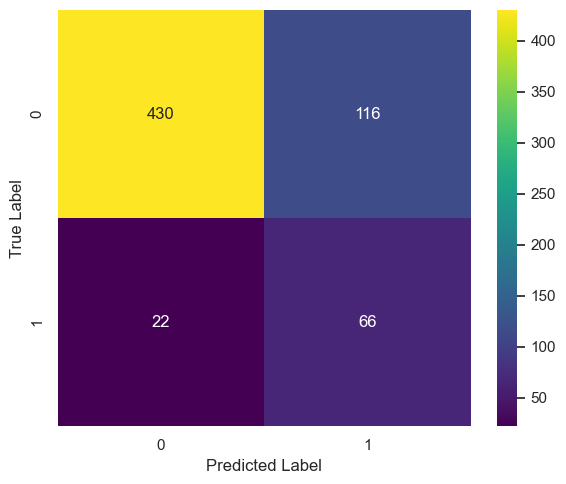

In [1101]:
# Import the confusion_matrix function
from utility import plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_log, class_labels=[0, 1])

- The Logistic Regression model achieved an accuracy of about 78%. 

- The classification report shows stronger performance in predicting the majority class; No Churn compared to the minority class; Churn which is expected given the dataset imbalance. 

- The confusion matrix further shows correct identification of most non churn cases. However, churn predictions remain more challenging.  

- These results confirm Logistic Regression as a reasonable baseline model, providing a benchmark for evaluating more complex classifiers in the following sections.  


### 4.3. Decision Tree Classifier

The Decision Tree classifier was applied to the churn dataset as one of the predictive models. Decision Trees split the dataset into smaller subsets by learning simple decision rules based on feature values. This makes them easy to interpret and useful for classification tasks.

In [1102]:
# Instantiate a decision tree model
dec_model = DecisionTreeClassifier(random_state=42)

# Fit the training data
dec_model.fit(X_train_smote, y_train_smote)

# Make predictions on test set
y_pred_dec = dec_model.predict(X_test_scaled)

# Compute the accuracy of the model
dec_acc = accuracy_score(y_test, y_pred_dec)
print("Decision Tree model accuracy:", dec_acc)

Decision Tree model accuracy: 0.8974763406940063


In [1103]:
# Display the classification report
dec_report = classification_report(y_true=y_test, y_pred=y_pred_dec)
print("Decision Tree classification report\n")
print(dec_report)

Decision Tree classification report

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       546
           1       0.61      0.75      0.67        88

    accuracy                           0.90       634
   macro avg       0.78      0.84      0.80       634
weighted avg       0.91      0.90      0.90       634



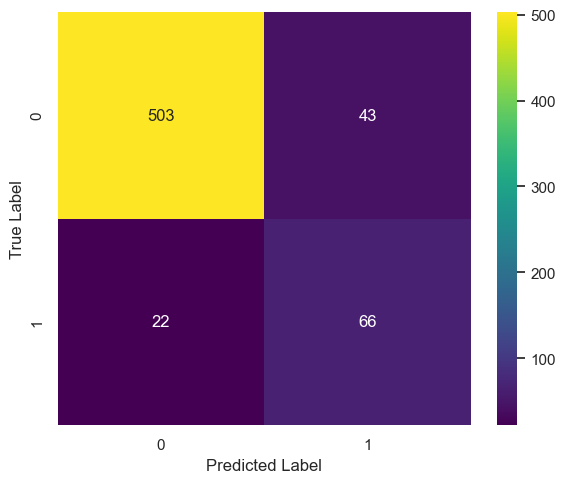

In [1104]:
# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dec, class_labels=[0, 1])

After training and testing the model, the following are the evaluation metrics:

- Accuracy: At about 89.7% showing strong overall predictive performance.

- Classification Report: Precision, recall and F1-scores showed balanced performance. There is improvement in recall for the minority; churn class compared to Logistic Regression.

- Confusion Matrix: Most non churn and churn customers were classified correctly with fewer misclassifications.

This evaluation demonstrates that the Decision Tree classifier is more effective than Logistic Regression in capturing churn cases. However, it may still be prone to overfitting without more tuning.

### 4.4. Random Forest Classifier

In [1105]:
# instantiate a random forest model
ran_model = RandomForestClassifier(random_state=42)

# fit the training data
ran_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_ran = ran_model.predict(X_test_scaled)

# compute the accuracy of the model
ran_acc = accuracy_score(y_test, y_pred_ran)
print("Random Forest model accuracy:", ran_acc)

Random Forest model accuracy: 0.917981072555205


In [1106]:
 #display the classification report
ran_report = classification_report(y_true=y_test, y_pred=y_pred_ran)
print("Random Forest classification report\n")
print(ran_report)

Random Forest classification report

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       546
           1       0.70      0.73      0.71        88

    accuracy                           0.92       634
   macro avg       0.83      0.84      0.83       634
weighted avg       0.92      0.92      0.92       634



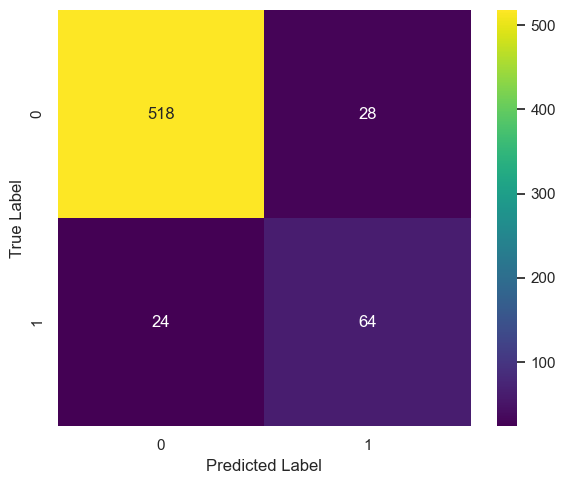

In [1107]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_ran, class_labels=[0, 1])

The Random Forest model has a recall score of about 0.73, which is lower than the recall scores of the Decision Tree and Logistic Regression models. This implies that out of all the customers who churned from the company, the model was able to predict 73% of them correctly.

From the confusion matrix plot, the true positive and true negative have the highest values, implying that the model is making correct predictions more frequently than incorrect predictions. This also shows that the model is not overfitting (i.e. performing poorly on unseen test data)

### 4.6. K-Nearest Neighbor Classifier

In [1108]:
# instantiate a K-nearest neighbor model
knn_model = KNeighborsClassifier(n_neighbors=5) # start with 5 neighbors

# fit the training data
knn_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_knn = knn_model.predict(X_test_scaled)

# compute the accuracy of the model
knn_acc = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbor model accuracy:", knn_acc)

K-Nearest Neighbor model accuracy: 0.7365930599369085


In [1109]:
# display the classification report
knn_report = classification_report(y_true=y_test, y_pred=y_pred_knn)
print("K-Nearest Neighbor classification report\n")
print(knn_report)

K-Nearest Neighbor classification report

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       546
           1       0.23      0.40      0.30        88

    accuracy                           0.74       634
   macro avg       0.56      0.59      0.57       634
weighted avg       0.80      0.74      0.76       634



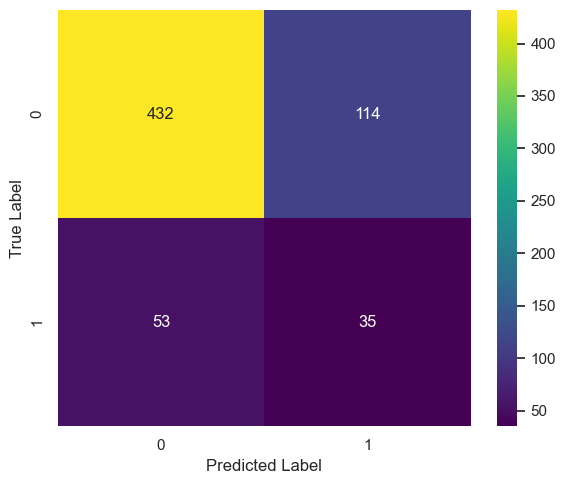

In [1110]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn, class_labels=[0, 1])

The K-Nearest Neighbor model has a recall score of about 0.4, which is much lower than the recall scores of the other models. This implies that out of all the customers who churned from the company, the model was able to predict 40% of them correctly, which is a very low prediction rate, lower than average (50%).

From the confusion matrix plot, however, the true positive and true negative have the highest values, implying that the model, despite having a lower recall, is still making correct predictions more frequently than incorrect predictions.

### 4.7. Gradient Boosting Classifier

In [1111]:
# instantiate a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42) 

# fit the training data
gb_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_gb = gb_model.predict(X_test_scaled)

# compute the accuracy of the model
gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting model accuracy:", gb_acc)

Gradient Boosting model accuracy: 0.9290220820189274


In [1112]:
# display the classification report
gb_report = classification_report(y_true=y_test, y_pred=y_pred_gb)
print("Gradient Boosting classification report\n")
print(gb_report)

Gradient Boosting classification report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       546
           1       0.72      0.81      0.76        88

    accuracy                           0.93       634
   macro avg       0.84      0.88      0.86       634
weighted avg       0.93      0.93      0.93       634



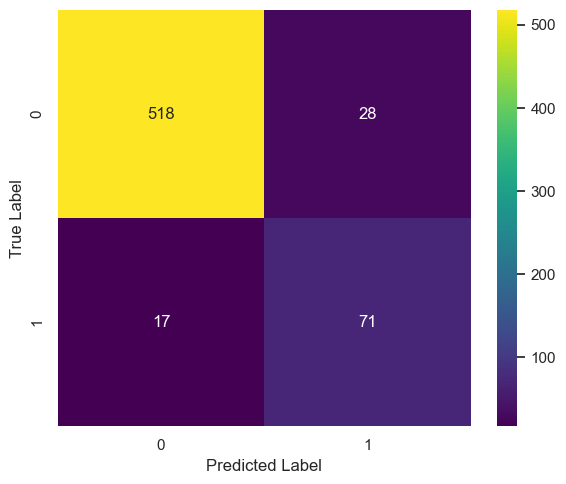

In [1113]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_gb, class_labels=[0, 1])

The Gradient Boosting model has a recall score of about 0.81, which is higher than the recall scores of the other models. This implies that out of all the customers who churned from the company, the model was able to predict 81% of them correctly, which is the best prediction rate thus far.

From the confusion matrix plot, the true positive and true negative have the highest values, implying that the model is making correct predictions more frequently than incorrect predictions. This also shows that the model is not overfitting (i.e. performing poorly on unseen test data).

### 5. Model Evaluation
In this section, we will evaluate the model performance, and pick the best two, which we will perform hyperparameter tuning on, to select the best performing model. As I had mentioned before, we will use recall and ROC-AUC Curve, to measure model performance.

### 5.1. ROC Curve
An ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the True Positive Rate (TPR) (Recall) against the False Positive Rate (FPR) at various threshold settings. The curve illustrates how well a model distinguishes between the two classes.

A model with a good performance will have a curve that bows toward the top-left corner of the plot. The Area Under the Curve (AUC) provides a single number summary of performance - the closer the AUC is to 1, the better the model. An ROC curve is useful for comparing multiple models' diagnostic ability.

We will plot the ROC curves of all the 6 models and compare the AUC scores.

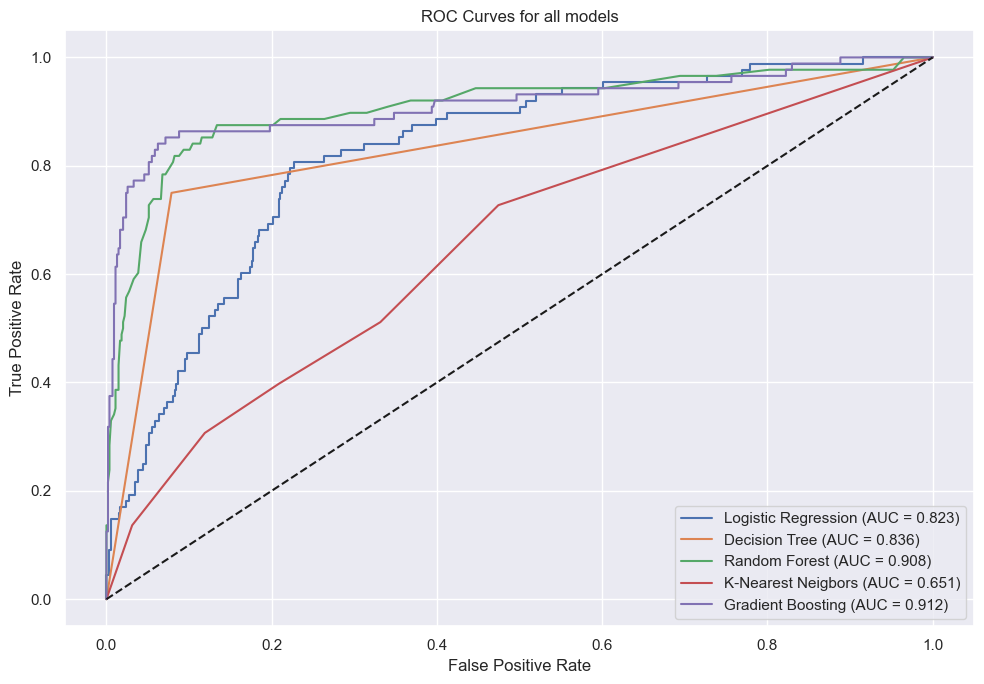

In [1114]:
# get predicted probabilities for models that support `predict_proba`
model_dict = {
    'Logistic Regression': log_model,
    'Decision Tree': dec_model,
    'Random Forest': ran_model,
    'K-Nearest Neigbors': knn_model,
    'Gradient Boosting': gb_model
}

# define the plot size
plt.figure(figsize=(10, 7))

for name, model in model_dict.items():
    # predict probabilities
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_scaled)[:, 1] # positive class
    else:
        # for models like XGBoost that use `predict()`
        y_probs = model.decision_function(X_test_scaled)

    # calculate ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# plot setting
plt.plot([0, 1], [0, 1], 'k--') # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for all models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

From the ROC Curve plot, we can see that Random Forest, XGBoost, and Gradient Boosting have the highest AUC scores, with Gradient Boosting having an AUC score of 0.912, and XGBoost having an AUC score of 0.910. K-Nearest Neighbors has the lowest AUC score of 0.651

### 5.2. Recall Score
Recall is a performance metric that represents the proportion of correctly predicted positive observations out of all actual positive observations. In other terms:

Of all the actual positive items, how many did the model correctly identify?

A higher recall means very few false negatives, which implies that the model makes correct predictions more than false predictions, which is what we are after anyway.

In this section, we will create a table that has each model with its recall score. This will help in determining the top performing models on unseen data.

In [1115]:
# compute recall for each model using model_dict and collect results
results = []
for name, model in model_dict.items():
    y_pred = model.predict(X_test_scaled)
    r = recall_score(y_test, y_pred)
    results.append({'Model': name, 'Recall': round(r, 3)})

# create and display a single table
recall_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False).reset_index(drop=True)
recall_df

,Model,Recall
0,Gradient Boosting,0.807
1,Logistic Regression,0.750
2,Decision Tree,0.750
3,Random Forest,0.727
4,K-Nearest Neigbors,0.398


From the analysis on recall and ROC, we can conclude that the Gradient Boosting is the highest performing model, with a recall score of 0.807, and an AUC score of 0.912, follwoed by the XGBoost classifier, with a recall score of 0.795, and an AUC score of 0.910. We will perform hyperparameter tuning on these two models to try and improve the performance of each model, and again compare and see which model performs the best, based on those two metrics.

But before we go to hyperparameter tuning, we can check the top important features in the Gradient Boosting classifier.

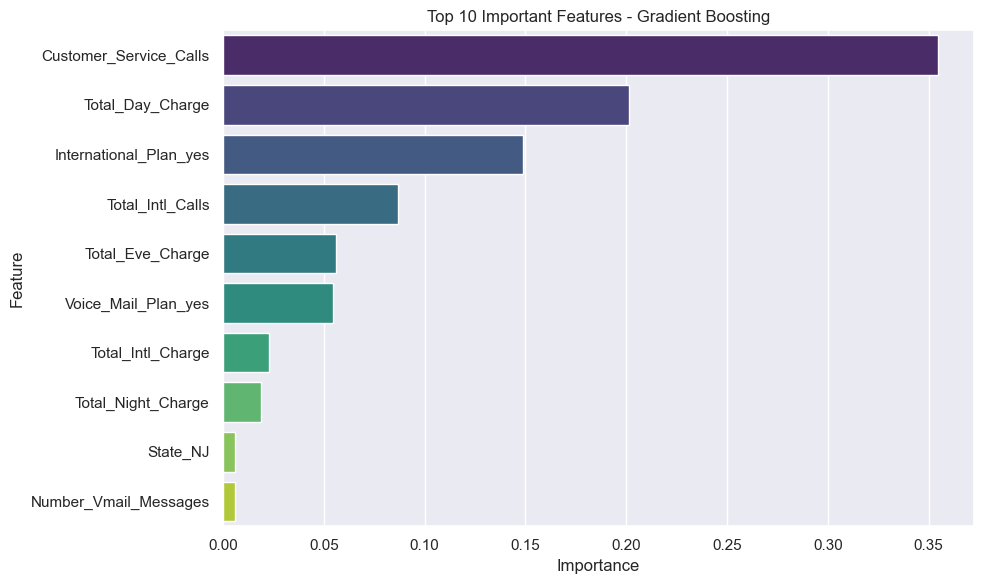

In [ ]:
# get feature importances
importances = gb_model.feature_importances_
features = X_train.columns

# create a dataframe
feature_importance_df = pd.DataFrame(
    {
        'Feature': features,
        'Importance': importances
    }
).sort_values(by='Importance', ascending=False)

# plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features - Gradient Boosting')
plt.tight_layout()
plt.show()

From the plot, the most important features for the model are Customer_Service_Calls, Total_Day_Charge, and International_Plan_Yes

### 6. Model Hyperparameter Tuning.
Model hyperparameter tuning in classification machine learning entails optimizing the external configuration settings (hyperparameters) that guide the training process of a model. These parameters, such as the regularization strength in logistic regression, the number of neighbors in K-NN, or the maximum depth in decision trees, are not learned from data, but significantly influence model performance. Proper tuning ensures that the model generalizes well to unseen data, avoids overfitting, and achieves optimal performance metrics such as accuracy, recall, and f1 score.

Two common methods for hyperparameter tuning are Grid Search and Random Search:

Grid Search exhaustively tests every possible combination of specified hyperparameter values. For example, if tuning two hyperparameters with five options each, grid search will evaluate all 25 combinations. While this ensures that the optimal combination (within the grid) is found, it becomes computationally expensive and inefficient as the number of parameters or their value ranges increase.

Random Search on te other hand samples combinations of hyperparameters at random. While this doesn't guarantee evaluating all possibilities, it often determines a good (or even optimal) combination with fewer iterations, especially when only a few hyperparameters significantly affect model performance. This makes it faster and more scalable for high-dimensional search spaces.

Comparison

Grid Search is ideal when the hyperparameter space is small and well-defined.
Random Search is better suited for large, complex, or less-understood search spaces
In practice, Random Search if often more efficient, and can yield nearly optimal results in a fraction of the time, making it more suitable for many real-world classification tasks.

In this section, we will mainly use Random Search to obtain the best hyperparameters for training our model: Gradient Boosting 

### 6.1. Gradient Boosting Hyperparameter Tuning
We will first tune the Gradient Boosting model. The main parameters we will look out for in the tuning process are:

Learning rate: Controls the contribution of each tree to the final prediction. A smaller value makes the model more robust, but requires more estimators to achieve high performance. By default, learning_rate = 0.1

n_estimators: Defines the number of boosting iterations (trees) to be added. More estimators usually lead to better model performance, but also increases the risk of overfitting. By default, n_estimators = 100

max_depth: Specified the maximum depth of each individual tree. Shallow trees might underfit, while deeper trees can overfit. It is crucial to find the right depth. By default, max_depth = None